In [1]:
!pip install caer --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 17.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 80.9 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install canaro --user

In [3]:
import os
import cv2 as cv
import numpy as np
import caer
import canaro
import gc
import sklearn.model_selection as skm
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Compiling data

In [4]:
people = []
channels = 1
char_path = r'/kaggle/input/avengers-actors-images-dataset'
for file in os.listdir(char_path):
    people.append(file)

In [5]:
print(f'Number of classes: {len(people)}')
print(f'Class members: {people}')

Number of classes: 6
Class members: ['steve_rogers (Chris Evans)', 'tony_stark (Robert Downey Jr.)', 'clint_barton (Jeremy Renner)', 'bruce_banner (Mark Ruffalo)', 'thor (Chris Hemsworth)', 'Natasha_Romanoff (Scarlett Johansson)']


In [6]:
train = caer.preprocess_from_dir(char_path, people, channels=channels, IMG_SIZE = (200,200), isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] 86 files found in 0.00920724868774414s
[INFO] 100 files found in 0.012245655059814453s
[INFO] 100 files found in 0.010984182357788086s
[INFO] 100 files found in 0.009485721588134766s
[INFO] 100 files found in 0.010570287704467773s
[INFO] 100 files found in 0.009937047958374023s
----------------------------------------------
[INFO] 586 files preprocessed! Took 0m 5s


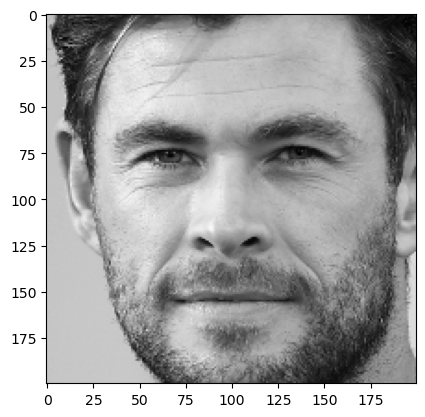

In [16]:
plt.imshow(train[1][0], cmap = 'gray')

In [17]:
print(train)

[[tensor([[33, 89, 80,  ..., 15, 13, 12],
          [29, 90, 103,  ..., 17, 12, 13],
          [31, 123, 115,  ..., 18, 11, 10],
          ...,
          [124, 116, 107,  ..., 40, 38, 39],
          [111, 108, 105,  ..., 39, 40, 39],
          [105, 94, 89,  ..., 38, 38, 39]], dtype=uint8) 3]
 [tensor([[172, 160, 164,  ..., 20, 29,  9],
          [171, 177, 173,  ..., 11, 21, 44],
          [175, 177, 173,  ..., 15, 11, 15],
          ...,
          [179, 180, 180,  ..., 131, 140, 121],
          [178, 179, 179,  ..., 132, 134, 131],
          [180, 178, 179,  ..., 132, 133, 133]], dtype=uint8) 4]
 [tensor([[222, 224, 224,  ..., 79, 180, 232],
          [222, 223, 223,  ..., 92, 186, 223],
          [222, 222, 222,  ..., 127, 201, 215],
          ...,
          [34, 42, 34,  ..., 216, 216, 216],
          [33, 39, 33,  ..., 216, 216, 216],
          [30, 30, 28,  ..., 216, 216, 216]], dtype=uint8) 2]
 ...
 [tensor([[37, 42, 45,  ..., 49, 35, 35],
          [50, 35, 35,  ..., 49, 41, 36

In [18]:
print(train.shape)
print(len(train))
print(train[0].shape)

(586, 2)
586
(2,)


In [19]:
featureSet , labels = caer.sep_train(train ,IMG_SIZE=(200,200), channels=channels)

In [20]:
print(featureSet[0])

[[[ 33]
  [ 89]
  [ 80]
  ...
  [ 15]
  [ 13]
  [ 12]]

 [[ 29]
  [ 90]
  [103]
  ...
  [ 17]
  [ 12]
  [ 13]]

 [[ 31]
  [123]
  [115]
  ...
  [ 18]
  [ 11]
  [ 10]]

 ...

 [[124]
  [116]
  [107]
  ...
  [ 40]
  [ 38]
  [ 39]]

 [[111]
  [108]
  [105]
  ...
  [ 39]
  [ 40]
  [ 39]]

 [[105]
  [ 94]
  [ 89]
  ...
  [ 38]
  [ 38]
  [ 39]]]


In [21]:
print(labels[0:10])

[3 4 2 2 0 3 3 3 2 3]


In [22]:
print(featureSet.shape)
print(len(featureSet))
print(len(labels))

(586, 200, 200, 1)
586
586


In [23]:
from tensorflow.keras.utils import to_categorical
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(people))

In [24]:
print(featureSet[0])

[[[0.12941177]
  [0.34901962]
  [0.3137255 ]
  ...
  [0.05882353]
  [0.05098039]
  [0.04705882]]

 [[0.11372549]
  [0.3529412 ]
  [0.40392157]
  ...
  [0.06666667]
  [0.04705882]
  [0.05098039]]

 [[0.12156863]
  [0.48235294]
  [0.4509804 ]
  ...
  [0.07058824]
  [0.04313726]
  [0.03921569]]

 ...

 [[0.4862745 ]
  [0.45490196]
  [0.41960785]
  ...
  [0.15686275]
  [0.14901961]
  [0.15294118]]

 [[0.43529412]
  [0.42352942]
  [0.4117647 ]
  ...
  [0.15294118]
  [0.15686275]
  [0.15294118]]

 [[0.4117647 ]
  [0.36862746]
  [0.34901962]
  ...
  [0.14901961]
  [0.14901961]
  [0.15294118]]]


In [25]:
print(labels[0:10])

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


# Spliting data

In [26]:
split_data = skm.train_test_split(featureSet, labels, test_size=.2)
x_train, x_val, y_train, y_val = (np.array(item) for item in split_data)

split_data = skm.train_test_split(x_val, y_val, test_size=.5)
x_val, x_test, y_val, y_test = (np.array(item) for item in split_data)

In [27]:
print(f'{len(x_train)}, {len(y_train)}')
print(f'{len(x_val)}, {len(y_val)}')
print(f'{len(x_test)}, {len(y_test)}')

468, 468
59, 59
59, 59


# People distribution across training, validation and testing data

In [31]:
people_split_train = {}
for i in range(len(y_train)):
    if people[np.argmax(y_train[i])] in people_split_train:
        people_split_train[people[np.argmax(y_train[i])]] += 1
    else:
        people_split_train[people[np.argmax(y_train[i])]] = 0
        
people_split_val = {}
for i in range(len(y_val)):
    if people[np.argmax(y_val[i])] in people_split_val:
        people_split_val[people[np.argmax(y_val[i])]] += 1
    else:
        people_split_val[people[np.argmax(y_val[i])]] = 0
        
people_split_test = {}
for i in range(len(y_test)):
    if people[np.argmax(y_test[i])] in people_split_test:
        people_split_test[people[np.argmax(y_test[i])]] += 1
    else:
        people_split_test[people[np.argmax(y_test[i])]] = 0

In [32]:
print(people_split_train)
print(people_split_val)
print(people_split_test)

{'bruce_banner (Mark Ruffalo)': 80, 'tony_stark (Robert Downey Jr.)': 79, 'steve_rogers (Chris Evans)': 65, 'Natasha_Romanoff (Scarlett Johansson)': 77, 'clint_barton (Jeremy Renner)': 82, 'thor (Chris Hemsworth)': 79}
{'Natasha_Romanoff (Scarlett Johansson)': 11, 'bruce_banner (Mark Ruffalo)': 9, 'clint_barton (Jeremy Renner)': 6, 'thor (Chris Hemsworth)': 10, 'steve_rogers (Chris Evans)': 9, 'tony_stark (Robert Downey Jr.)': 8}
{'tony_stark (Robert Downey Jr.)': 10, 'thor (Chris Hemsworth)': 8, 'Natasha_Romanoff (Scarlett Johansson)': 9, 'clint_barton (Jeremy Renner)': 9, 'bruce_banner (Mark Ruffalo)': 8, 'steve_rogers (Chris Evans)': 9}


In [33]:
del train
del featureSet
del labels
gc.collect()

14599

# Building and training model

In [34]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

In [35]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]


In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_train.shape)

(468, 200, 200, 1)
(468, 6)
(59, 200, 200, 1)
(468, 6)


In [ ]:
# SGD	Simple and efficient
# Adam	Fast convergence
# RMSprop	Good performance on noisy gradients
# Adagrad	Adapts the learning rate to the gradient

# Simple model

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad
from tensorflow.keras.regularizers import l2

# Model structure

# model_s = Sequential()
# model_s.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1), kernel_regularizer=l2(0.001)))
# model_s.add(MaxPooling2D((2, 2)))
# model_s.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
# model_s.add(MaxPooling2D((2, 2)))
# model_s.add(Flatten())
# model_s.add(Dense(6, activation='softmax'))

# Hyperparameters

learning_rate = 0.01
momentum = 0.9
# initially was 1e-6
weight_decay = 1e-6

optimizer = SGD(learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay)
# optimizer = RMSprop(learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay)

# Compile the model.

# model_s.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', 'mse'])

BATCH_SIZE = 32
EPOCHS = 80

# More complex model

In [117]:
model_c = Sequential()
model_c.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 1), kernel_regularizer=l2(0.001)))
model_c.add(MaxPooling2D((2, 2), strides=2))
model_c.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_c.add(MaxPooling2D((2, 2), strides=2))
model_c.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_c.add(MaxPooling2D((2, 2), strides=2))
model_c.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_c.add(MaxPooling2D((2, 2), strides=2))
model_c.add(Flatten())
model_c.add(Dense(1024, activation='relu'))
model_c.add(Dense(6, activation='softmax'))

learning_rate = 0.01
momentum = 0.9
# initially was 1e-6
weight_decay = 1e-6

optimizer = SGD(learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay)
# optimizer = RMSprop(learning_rate=learning_rate, momentum=momentum, weight_decay=weight_decay)

# Compile the model.

model_c.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', 'mse'])

BATCH_SIZE = 16
EPOCHS = 30

In [119]:
history = model_c.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    callbacks=callbacks_list,
    steps_per_epoch=len(x_train)//BATCH_SIZE,
    validation_steps=len(y_val)//BATCH_SIZE
)

Epoch 1/30
29/29 [==============================] - 3s 73ms/step - loss: 1.7946 - accuracy: 0.1875 - mse: 0.1389 - val_loss: 1.7891 - val_accuracy: 0.1875 - val_mse: 0.1386 - lr: 0.0100
Epoch 2/30
29/29 [==============================] - 2s 69ms/step - loss: 1.7853 - accuracy: 0.1881 - mse: 0.1384 - val_loss: 1.7743 - val_accuracy: 0.2708 - val_mse: 0.1378 - lr: 0.0100
Epoch 3/30
29/29 [==============================] - 2s 68ms/step - loss: 1.7547 - accuracy: 0.2677 - mse: 0.1365 - val_loss: 1.7838 - val_accuracy: 0.1875 - val_mse: 0.1380 - lr: 0.0100
Epoch 4/30
29/29 [==============================] - 2s 69ms/step - loss: 1.7219 - accuracy: 0.2743 - mse: 0.1343 - val_loss: 1.7066 - val_accuracy: 0.2708 - val_mse: 0.1336 - lr: 0.0100
Epoch 5/30
29/29 [==============================] - 2s 69ms/step - loss: 1.6096 - accuracy: 0.3584 - mse: 0.1266 - val_loss: 1.6584 - val_accuracy: 0.4167 - val_mse: 0.1256 - lr: 0.0100
Epoch 6/30
29/29 [==============================] - 2s 69ms/step - los

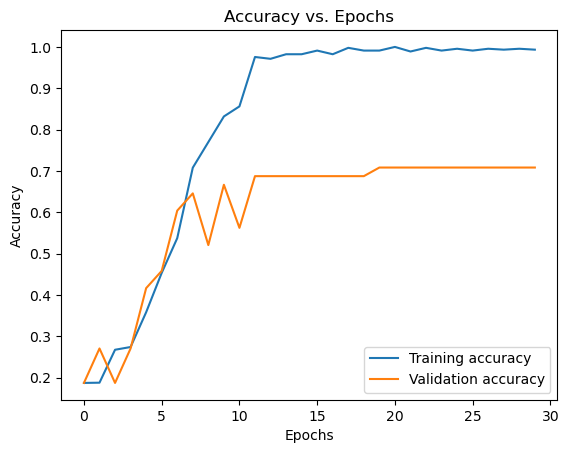

In [120]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1. model.fit() does not train on validation data. 
1. The validation data is only used to evaluate the model's performance after each epoch. The model is trained on the training data only.
1. The validation data is a separate set of data that is not used to train the model. 
1. It is used to evaluate the model's performance after each epoch. This allows you to see how well the model is generalizing to new data. 
1. If the model is performing well on the validation data, then it is likely to perform well on new data that it has not seen before.

# Evaluating model

In [39]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (200, 200))
    img = caer.reshape(img, (200, 200), 1)
    return img   

In [41]:
def evaluate_accuracy(model, x_test, y_test):  
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    y_pred = model.predict(x_test)
    num_right = 0
    for i in range(len(y_pred)):
        if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
            num_right += 1

    print(f'ACCURACY: {round(num_right/len(y_test)*100, 2)}%')

In [134]:
evaluate_accuracy(model_c, x_test, y_test)

Test loss: 1.717252254486084
Test accuracy: 0.6779661178588867
2/2 [==============================] - 0s 33ms/step
ACCURACY: 67.8%


# Categorical accuracy on entire dataset

In [46]:
def evaluate_categrorical_accuracy(model):    
    main_folder_path = r'/kaggle/input/avengers-actors-images-dataset'
    predict_correct = {}

    for char_name in os.listdir(main_folder_path):
        print(f'{char_name}:')
        num_total_images = 0
        num_predicted_correct = 0
        char_path = os.path.join(main_folder_path, char_name)
        for img_name in os.listdir(char_path):
            num_total_images += 1
            img_path = os.path.join(char_path, img_name)
            img = cv.imread(img_path)
            prediction = model.predict(prepare(img))
            if(people[np.argmax(prediction)] == char_name):
                num_predicted_correct += 1
        print(f'{100*num_predicted_correct/num_total_images}')
        predict_correct[char_name] = 100*num_predicted_correct/num_total_images
    return predict_correct

In [143]:
predict_correct = evaluate_categrorical_accuracy(model_c)
for item in predict_correct:
        print(f'{item}: {round(predict_correct[item], 2)}%')

steve_rogers (Chris Evans):
1/1 [==============================] - 0s 24ms/step
84.88372093023256
tony_stark (Robert Downey Jr.):
1/1 [==============================] - 0s 28ms/step
67.0
clint_barton (Jeremy Renner):
1/1 [==============================] - 0s 19ms/step
94.0
bruce_banner (Mark Ruffalo):
1/1 [==============================] - 0s 19ms/step
80.0
thor (Chris Hemsworth):
1/1 [==============================] - 0s 19ms/step
89.0
Natasha_Romanoff (Scarlett Johansson):
1/1 [==============================] - 0s 19ms/step
94.0
steve_rogers (Chris Evans): 84.88%
tony_stark (Robert Downey Jr.): 67.0%
clint_barton (Jeremy Renner): 94.0%
bruce_banner (Mark Ruffalo): 80.0%
thor (Chris Hemsworth): 89.0%
Natasha_Romanoff (Scarlett Johansson): 94.0%


# Save model

In [142]:
# model1.save('model1_acc69.h5')
# model1.save('model1_acc72.h5')
model_c.save('model_c3.h5')

# Random testing

In [53]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (200, 200))
    img = caer.reshape(img, (200, 200), 1)
    return img   

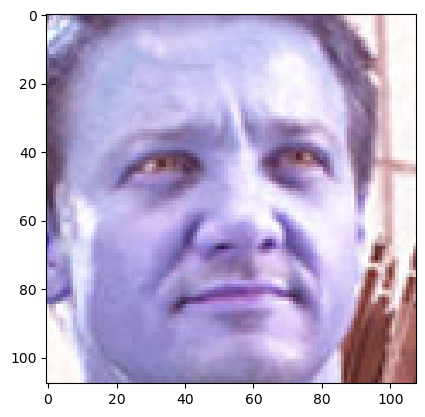

1/1 [==============================] - 0s 21ms/step
clint_barton (Jeremy Renner)


In [131]:
char_path = r'/kaggle/input/avengers-actors-images-dataset/clint_barton (Jeremy Renner)/clint_barton133.png'
img = cv.imread(char_path)


plt.figure()
plt.imshow(img)
plt.show()


img = prepare(img)
predictions = model_c.predict(img)
# print(people)
# print(predicitions)
print(people[np.argmax(predictions)])

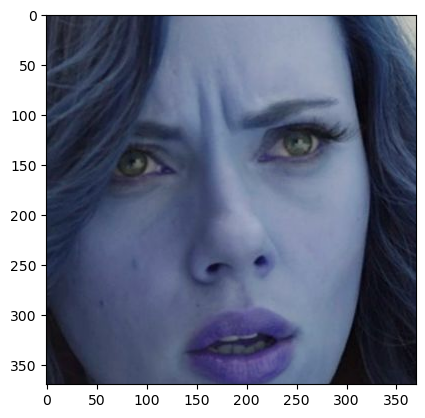

1/1 [==============================] - 0s 19ms/step
Natasha_Romanoff (Scarlett Johansson)


In [132]:
char_path = r'/kaggle/input/avengers-actors-images-dataset/Natasha_Romanoff (Scarlett Johansson)/Natasha_Romanoff105.png'
img = cv.imread(char_path)


plt.figure()
plt.imshow(img)
plt.show()


img = prepare(img)
predictions = model_c.predict(img)
print(people[np.argmax(predictions)])

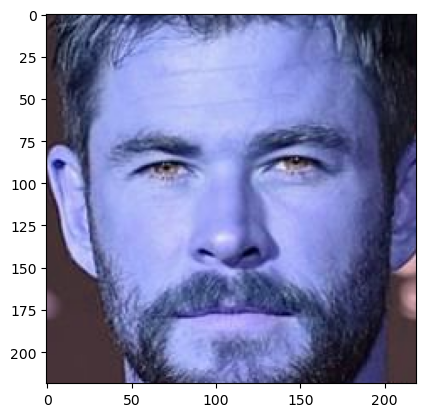

1/1 [==============================] - 0s 22ms/step
thor (Chris Hemsworth)


In [133]:
char_path = r'/kaggle/input/avengers-actors-images-dataset/thor (Chris Hemsworth)/thor151.png'
img = cv.imread(char_path)


plt.figure()
plt.imshow(img)
plt.show()


img = prepare(img)
predictions = model_c.predict(img)
# print(people)
# print(predicitions)
print(people[np.argmax(predictions)])

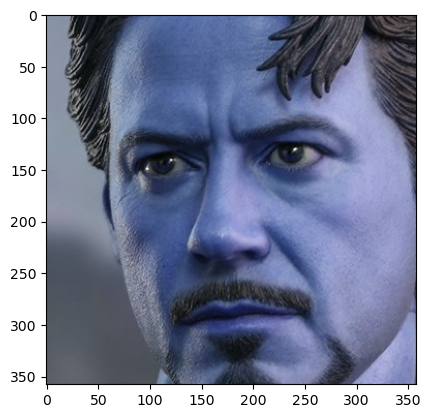

1/1 [==============================] - 0s 19ms/step
tony_stark (Robert Downey Jr.)


In [135]:
char_path = r'/kaggle/input/avengers-actors-images-dataset/tony_stark (Robert Downey Jr.)/tony_stark125.png'
img = cv.imread(char_path)


plt.figure()
plt.imshow(img)
plt.show()


img = prepare(img)
predictions = model_c.predict(img)
# print(people)
# print(predicitions)
print(people[np.argmax(predictions)])

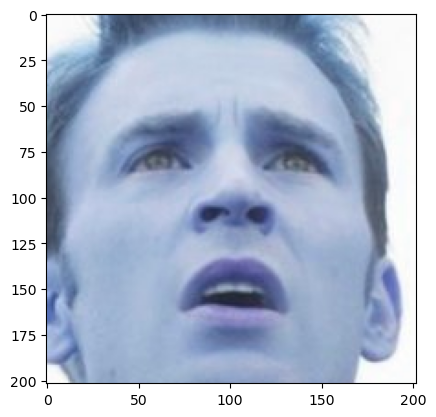

1/1 [==============================] - 0s 20ms/step
steve_rogers (Chris Evans)


In [140]:
char_path = r'/kaggle/input/avengers-actors-images-dataset/steve_rogers (Chris Evans)/steve_rogers111.png'
img = cv.imread(char_path)


plt.figure()
plt.imshow(img)
plt.show()


img = prepare(img)
predictions = model_c.predict(img)
# print(people)
# print(predicitions)
print(people[np.argmax(predictions)])

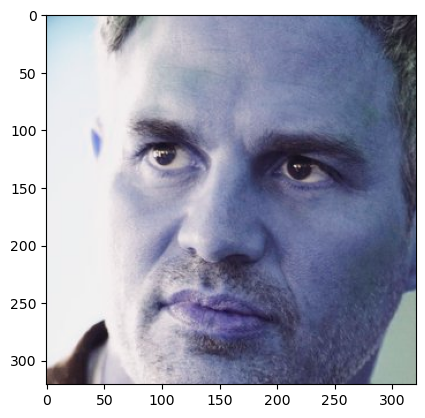

1/1 [==============================] - 0s 20ms/step
bruce_banner (Mark Ruffalo)


In [141]:
char_path = r'/kaggle/input/avengers-actors-images-dataset/bruce_banner (Mark Ruffalo)/bruce_banner111.png'
img = cv.imread(char_path)


plt.figure()
plt.imshow(img)
plt.show()


img = prepare(img)
predictions = model_c.predict(img)
# print(people)
# print(predicitions)
print(people[np.argmax(predictions)])